In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import glob
from tqdm import tqdm
import os


In [3]:
train_list = glob.glob('/shared_data/focussu/109.학습태도_및_성향_관찰_데이터/3.개방데이터/1.데이터/Training/01.원천데이터/processed_landmark/*.npy')
valid_list = glob.glob('/shared_data/focussu/109.학습태도_및_성향_관찰_데이터/3.개방데이터/1.데이터/Validation/01.원천데이터/processed_landmark/*.npy')
print(len(train_list))
print(len(valid_list))






1166835
138325


In [10]:
train_zero_count = 0
valid_zero_count = 0
train_zero_files = []
valid_zero_files = []
for train_path in tqdm(train_list, desc="Train 영행렬 검사"):
    try:
        data = np.load(train_path)
        # 0이 아닌 값이 하나도 없으면 영행렬
        if not np.any(data):
            train_zero_count += 1
            train_zero_files.append(train_path)
    except Exception as e:
        print(f"파일 로드 오류: {train_path}")

for valid_path in tqdm(valid_list, desc="Valid 영행렬 검사"):
    try:
        data = np.load(valid_path)
        # 0이 아닌 값이 하나도 없으면 영행렬
        if not np.any(data):
            valid_zero_count += 1
            valid_zero_files.append(valid_path)
    except Exception as e:
        print(f"파일 로드 오류: {valid_path}")

Valid 영행렬 검사: 100%|██████████| 138325/138325 [00:34<00:00, 4052.86it/s]


In [9]:
print(f"Train 영행렬 개수: {train_zero_count}/{len(train_list)}")
print(f"Valid 영행렬 개수: {valid_zero_count}/{len(valid_list)}")


Train 영행렬 개수: 7364/1166835
Valid 영행렬 개수: 618/138325


In [71]:
tmp =valid_zero_files[300]
filename =os.path.basename(tmp).split('_')[0]

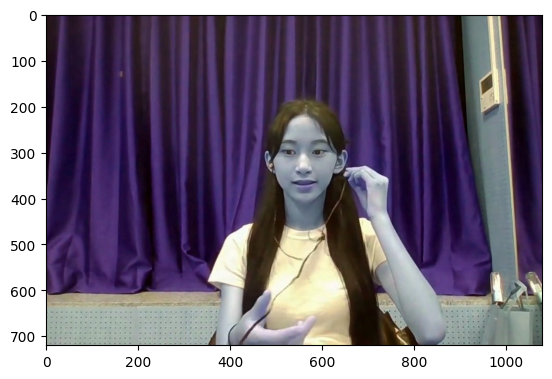

In [72]:


import cv2
import os
import matplotlib.pyplot as plt
img = glob.glob(f'/shared_data/focussu/109.학습태도_및_성향_관찰_데이터/3.개방데이터/1.데이터/Validation/01.원천데이터/*/{filename}.jpg')
plt.imshow(cv2.imread(img[0]))
plt.show()


In [ ]:
# import os
# for zero_file in train_zero_files:
#     os.remove(zero_file)
#     print(zero_file)

# for zero_file in valid_zero_files:
#     print(zero_file)